Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices datacet" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так,
чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.
    
Постройте диаграмму рассеяния на этих данных.

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%config InliBackend.figure_format = 'svg'
%matplotlib inline

In [40]:
from sklearn.datasets import load_boston

In [41]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [42]:
data = boston.data
data.shape

(506, 13)

In [43]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [44]:
target = boston.target
target[:13]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7])

In [45]:
X = pd.DataFrame(data,columns=sfeature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [47]:
price = boston.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,price, test_size= 0.3, random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

In [56]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [57]:
from sklearn.manifold import TSNE

In [59]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [60]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [61]:
X_train_tsne

array([[-1.07937365e+01, -4.13550091e+00],
       [-1.41071415e+00, -4.71862555e+00],
       [-1.05440292e+01, -8.94413853e+00],
       [-8.02262592e+00, -9.84524345e+00],
       [ 2.07014656e+01,  1.93065491e+01],
       [ 1.76388435e+01,  1.63844223e+01],
       [-1.12523689e+01, -3.46772623e+00],
       [ 2.04137039e+01,  2.54409199e+01],
       [-6.40470839e+00, -4.78429747e+00],
       [-1.92161846e+01, -8.41133690e+00],
       [-3.03956121e-01, -7.83731222e+00],
       [-7.49100208e+00, -7.49699879e+00],
       [-3.75385547e+00,  2.44423580e+00],
       [ 3.65536189e+00, -8.11936474e+00],
       [-6.15461779e+00,  4.55155993e+00],
       [ 1.86965179e+01,  1.99311543e+01],
       [ 2.65144634e+00, -9.56607342e+00],
       [-4.35278368e+00, -1.26714649e+01],
       [ 1.23798285e+01, -3.21898127e+00],
       [ 2.53778601e+00, -7.45177364e+00],
       [-8.29244614e+00, -8.19358635e+00],
       [ 8.60954046e-01,  1.84471881e+00],
       [ 1.99686775e+01,  1.70417652e+01],
       [-6.

In [62]:
X_train_tsne.shape

(354, 2)

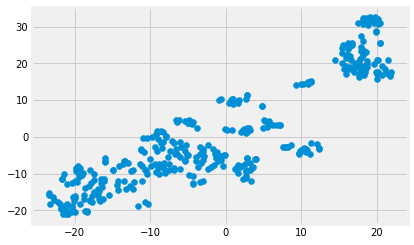

In [63]:
plt.scatter(X_train_tsne[:,0], X_train_tsne [:,1])

Задание 2

С помощью KMeans разбейте данные из тренировочного датасета на 3 кластера,используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеивания на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров 
разными цветами.

Вычислите среднее значение price и CRIM в разных кластерах.
 


In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters = 3)

In [66]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [67]:
pd.value_counts(labels_train)

0    166
1    114
2     74
dtype: int64

In [ ]:
не понятно 